In [64]:
import numpy as np
import matplotlib.pyplot as plt
import scipy.optimize
%matplotlib notebook

In [2]:
data = np.load('circles.npy')

'ax.set_xlim(-1,1)\nax.set_ylim(-1,1)'

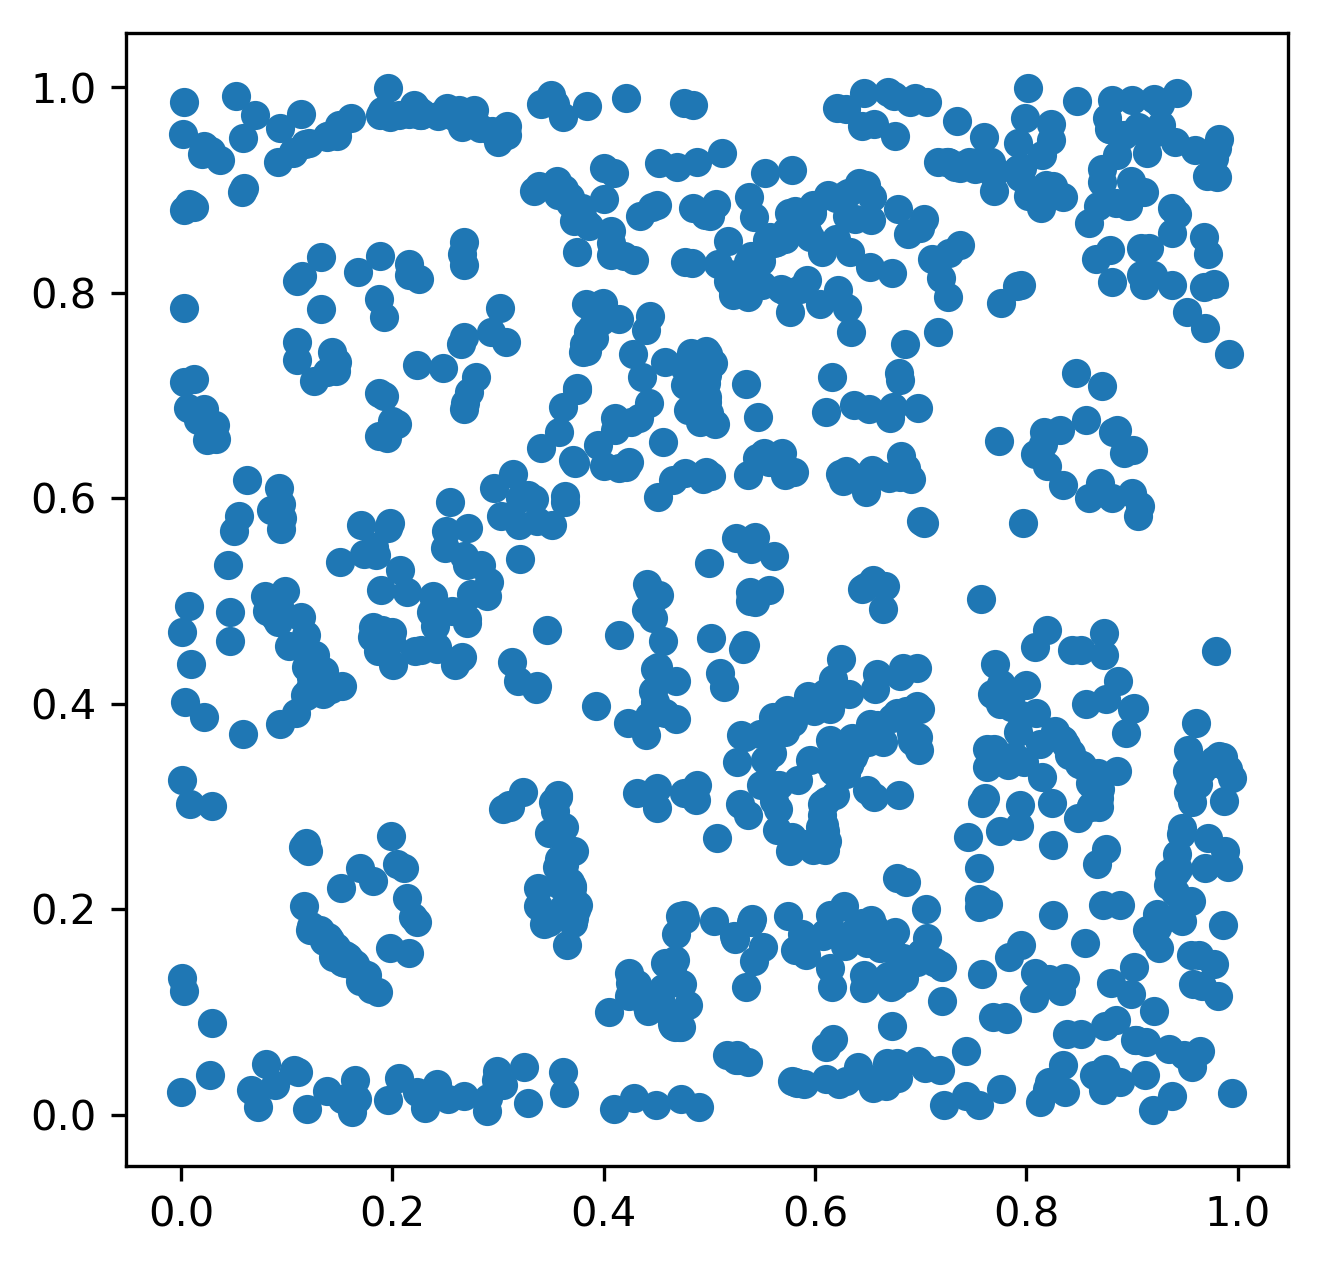

In [72]:
data.shape
fig = plt.figure(figsize=(5,5),dpi=300)
ax = fig.add_subplot(111)
ax.scatter(data[:,0],data[:,1])


In [100]:
def RANSAC(data):
    """Randomnly choose 3 points, fit circle to them and estimate inline count of points laying in |eps| around the frame of the cirlce"""
    eps = 0.1
    count = 7000
    best = {'x':0,'y':0,'R':0,'count':0,'inline':[]}
    if(data.shape[0]< 10): return
    for i in range(count):
        p1,p2,p3 = data[np.random.randint(0,data.shape[0],3),:]
        x1,y1 = p1
        x2,y2 = p2
        x3,y3 = p3
        #print(x1,x2)
        x = (x2**2-x3**2 + y2**2-y3**2 + (y3-y2)/(y2-y1)  * ( x1**2-x2**2 + y1**2-y2**2)) / 2 / (x2-x3 + (x2-x1)/2/(y2-y1))
        y = (2*x*(x2-x1) + x1**2-x2**2 + y1**2-y2**2) / 2 / (y2-y1)
        R_sqr = (x1-x)**2 + (y1-y)**2
        #print(data[:,0])
        inline = np.where(np.abs((data[:,0]-x)**2+(data[:,1]-y)**2-R_sqr) < eps**2)
        #print(np.abs((data[:,0]-x)**2+(data[:,1]-y)**2-R_sqr))
        #print(len(*inline))
        if(len(*inline) > best['count']):
            best['x'] = x
            best['y'] = y
            best['R'] = np.sqrt(R_sqr)
            best['count'] = len(*inline)
            best['inline'] = inline
    print('Inline count: %i' % best['count'])
    return plt.Circle((best['x'],best['y']),best['R'],fill=False), best['inline']


def LSQ(data):
    """ Fit circle to inliners found by RANSAC by mapping the data to a new feature space and using a least square solver"""
    x = np.ones((data.shape[0],3)) #add new column with 1 as new feature
    x[:,:2] = data
    y = np.sum(np.abs(data)**2,axis=-1)
    b1,b2,b3 = np.linalg.lstsq(x, y)[0]
    cx = b1/2
    cy = b2/2
    r = (cx**2+cy**2+b3)**(1/2)
    return plt.Circle((cx,cy),r,fill=False,color=(1,0,0))

def LM(data):
    """Fit circle to inliners found by RANSAC by using the Levenberg-Marquardt algo"""
    def loss_circ(x,c,r):
        return np.sum(np.linalg.norm(x-c, axis=1)+r)
    scipy.optimize.curve_fit

/home/jan/miniconda3/lib/python3.6/site-packages/ipykernel_launcher.py:13: RuntimeWarning: divide by zero encountered in double_scalars
  del sys.path[0]
/home/jan/miniconda3/lib/python3.6/site-packages/ipykernel_launcher.py:13: RuntimeWarning: invalid value encountered in double_scalars
  del sys.path[0]
/home/jan/miniconda3/lib/python3.6/site-packages/ipykernel_launcher.py:17: RuntimeWarning: invalid value encountered in less


Inline count: 186
Inline count: 165
Inline count: 209
Inline count: 122
Inline count: 135
Inline count: 158
Inline count: 107
Inline count: 109
Inline count: 115
Inline count: 108


(1125, 2)

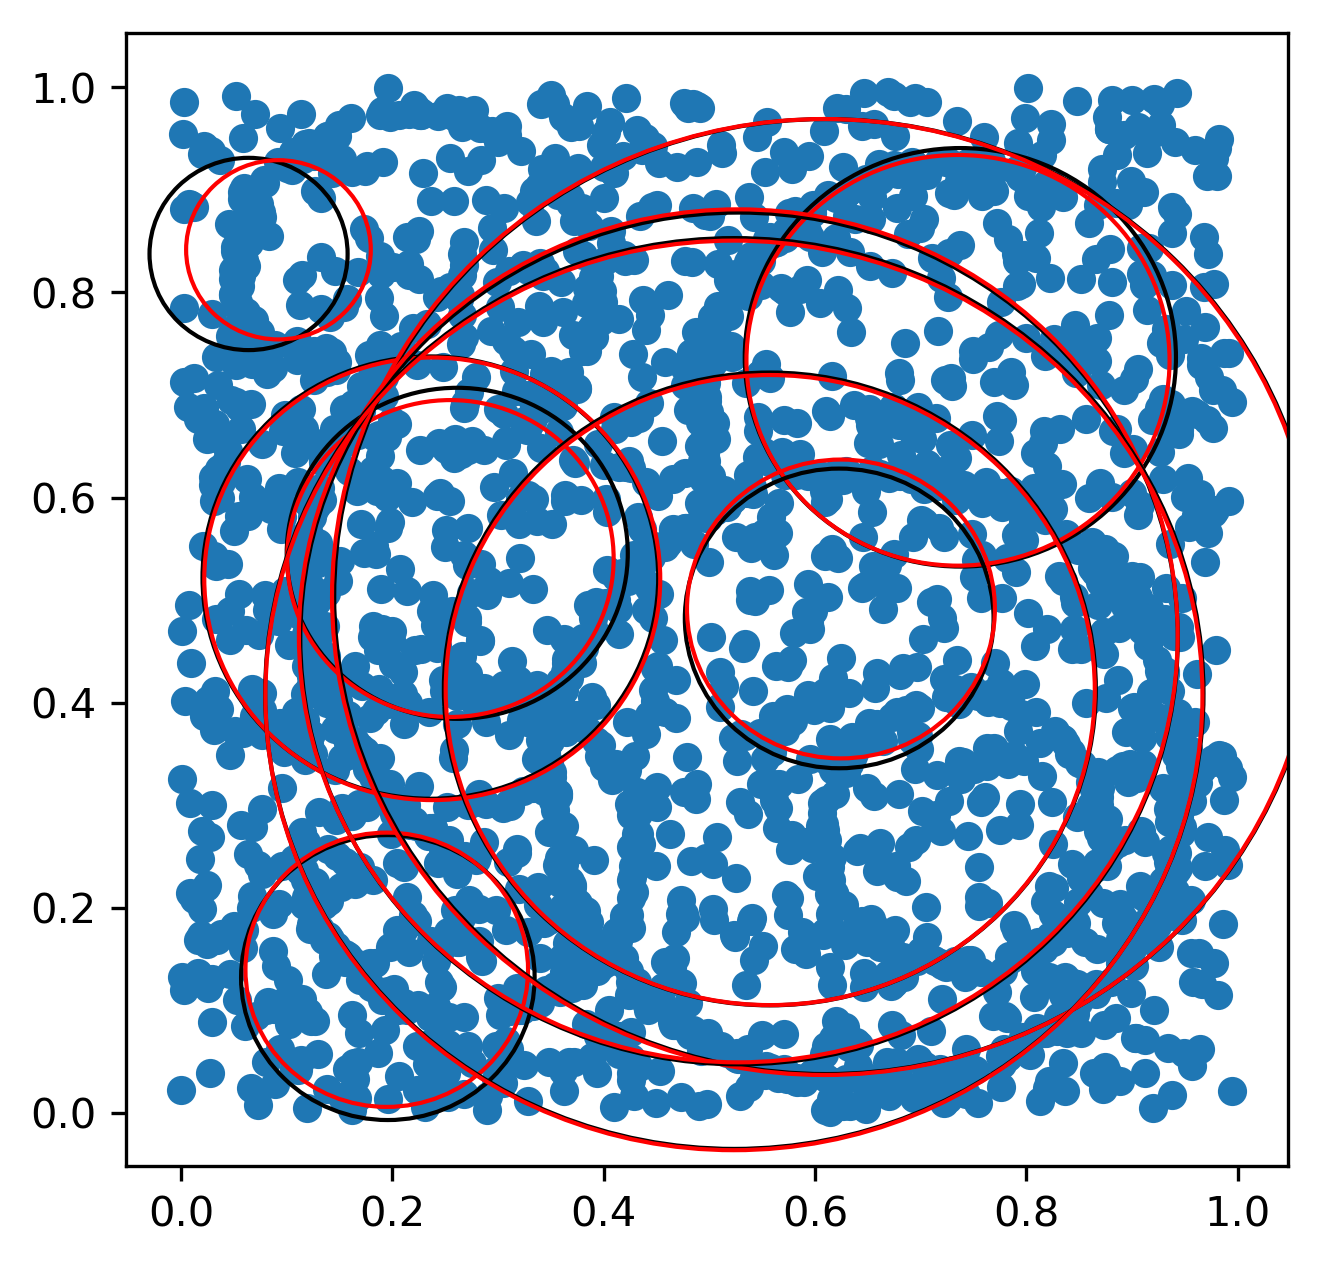

In [101]:
%matplotlib inline
inline = []
full_data = np.load('circles.npy')
data = full_data
fig = plt.figure(figsize=(5,5),dpi=300)
ax = fig.add_subplot(111)
ax.scatter(full_data[:,0],full_data[:,1])

for i in range(10):
    data = np.delete(data,inline,0)
    circle, inline = RANSAC(data)
    circlelsq = LSQ(data[inline])
    plt.gca().add_patch(circle)
    plt.gca().add_patch(circlelsq)


/home/jan/miniconda3/lib/python3.6/site-packages/ipykernel_launcher.py:13: RuntimeWarning: divide by zero encountered in double_scalars
  del sys.path[0]
/home/jan/miniconda3/lib/python3.6/site-packages/ipykernel_launcher.py:13: RuntimeWarning: invalid value encountered in double_scalars
  del sys.path[0]
/home/jan/miniconda3/lib/python3.6/site-packages/ipykernel_launcher.py:17: RuntimeWarning: invalid value encountered in less


Inline count: 201


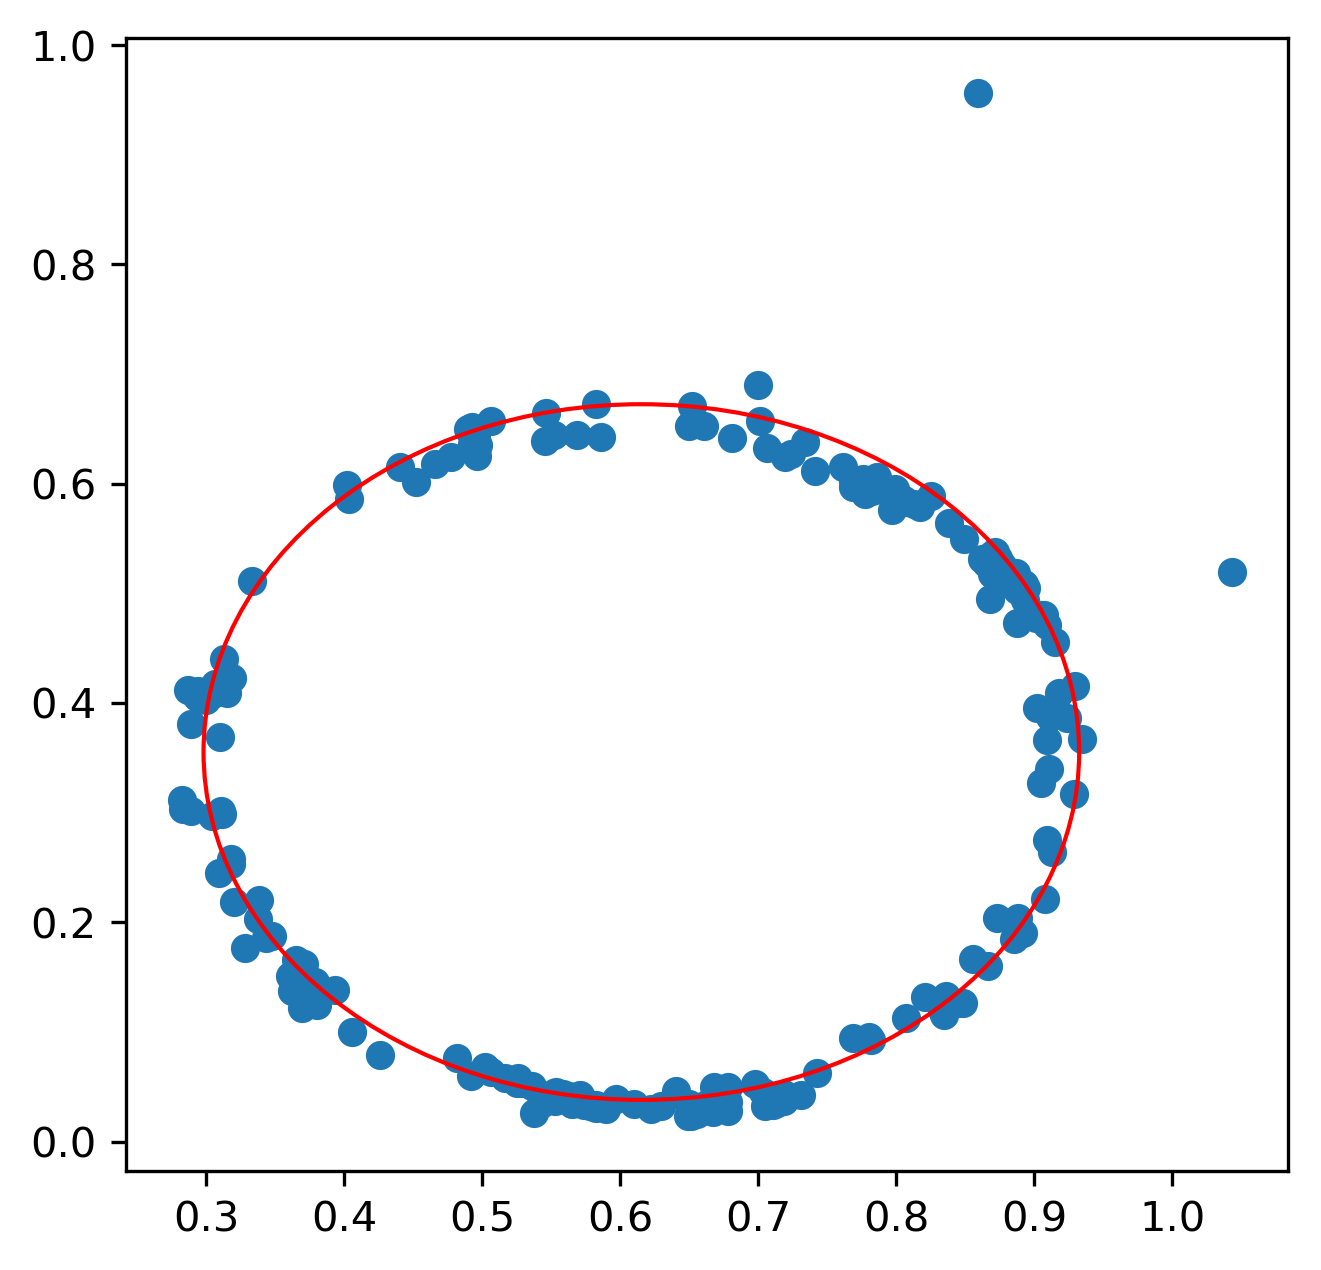

In [102]:
%matplotlib inline
#Comparison
circle, inline = RANSAC(full_data)
Noutlier = 3
inline_data = full_data[inline]
inline_data = np.vstack((inline_data,(np.random.rand(2 * Noutlier).reshape(2,Noutlier)+np.array([[0.6]*Noutlier,[0]*Noutlier])).T)) # add outliers
fig = plt.figure(figsize=(5,5),dpi=300)
plt.scatter(inline_data[:,0],inline_data[:,1])

circlelsq = LSQ(inline_data)
#plt.gca().add_patch(circle)
plt.gca().add_patch(circlelsq)


One sees that the least square algorithm performs quite well with outliers if they are not too many or too far off